# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({
                           "City": city, 
                           "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                          "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | nago
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | macau
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | caibarien
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | talagang
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | tumen
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | bassila
Processing R

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.76,69,100,1.34,PF,1676469998
1,mataura,-46.1927,168.8643,10.17,95,65,0.30,NZ,1676469999
2,geraldton,-28.7667,114.6000,22.23,78,40,5.14,AU,1676470000
3,faanui,-16.4833,-151.7500,27.22,76,19,4.93,PF,1676470001
4,beloha,-25.1667,45.0500,33.16,34,21,4.01,MG,1676470002


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.76,69,100,1.34,PF,1676469998
1,mataura,-46.1927,168.8643,10.17,95,65,0.30,NZ,1676469999
2,geraldton,-28.7667,114.6000,22.23,78,40,5.14,AU,1676470000
3,faanui,-16.4833,-151.7500,27.22,76,19,4.93,PF,1676470001
4,beloha,-25.1667,45.0500,33.16,34,21,4.01,MG,1676470002


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

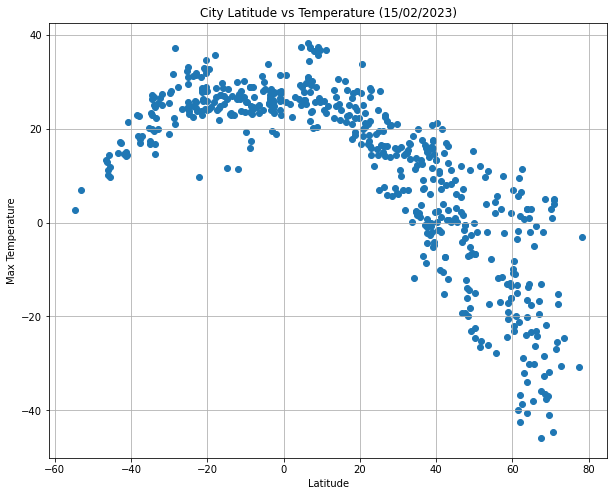

In [20]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs Temperature (15/02/2023)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

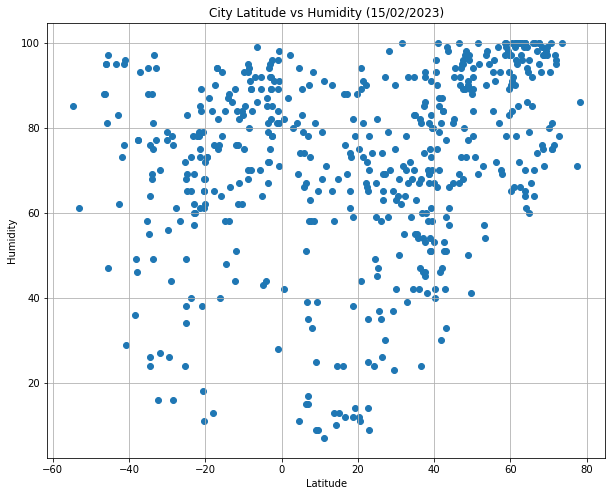

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (15/02/2023)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

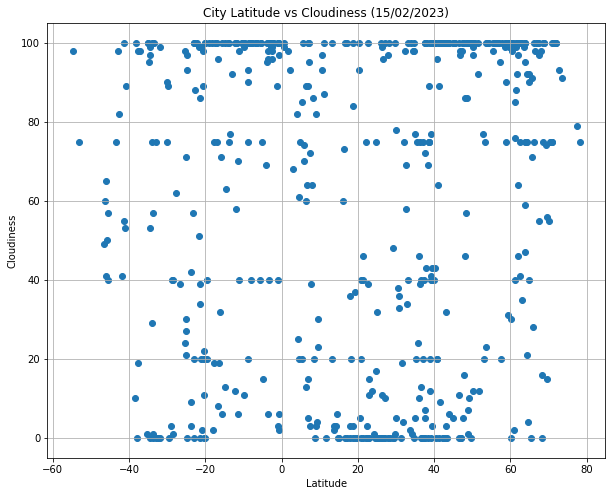

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (15/02/2023)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

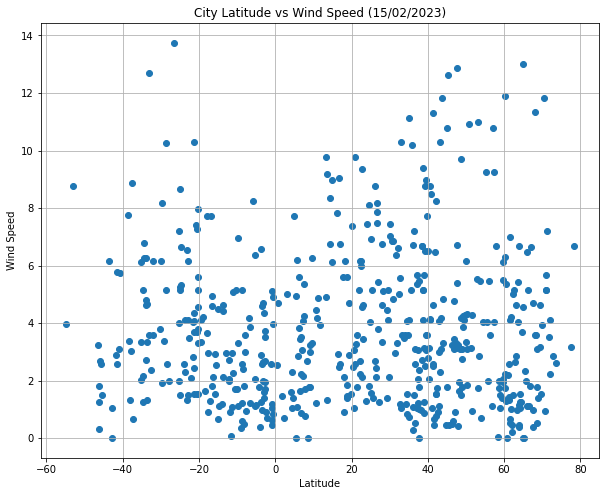

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,8))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (15/02/2023)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_value = x_values * slope + intercept

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,kapaa,22.0752,-159.3190,20.99,90,75,5.14,US,1676470003
7,nago,26.5881,127.9761,14.24,69,96,7.85,JP,1676470004
8,albany,42.6001,-73.9662,8.10,51,100,0.89,US,1676470005
9,macau,22.2006,113.5461,16.85,67,0,6.17,MO,1676470006
10,barrow,71.2906,-156.7887,-26.99,76,100,7.20,US,1676470007


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.76,69,100,1.34,PF,1676469998
1,mataura,-46.1927,168.8643,10.17,95,65,0.30,NZ,1676469999
2,geraldton,-28.7667,114.6000,22.23,78,40,5.14,AU,1676470000
3,faanui,-16.4833,-151.7500,27.22,76,19,4.93,PF,1676470001
4,beloha,-25.1667,45.0500,33.16,34,21,4.01,MG,1676470002


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7016888228304904


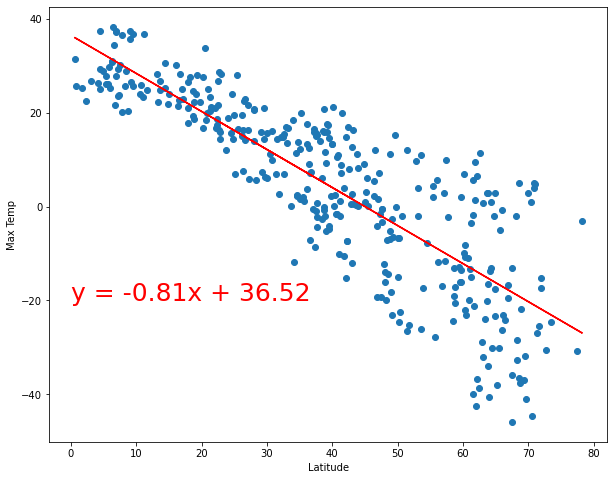

In [77]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(0,-20), fontsize=25, color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.2685292841498306


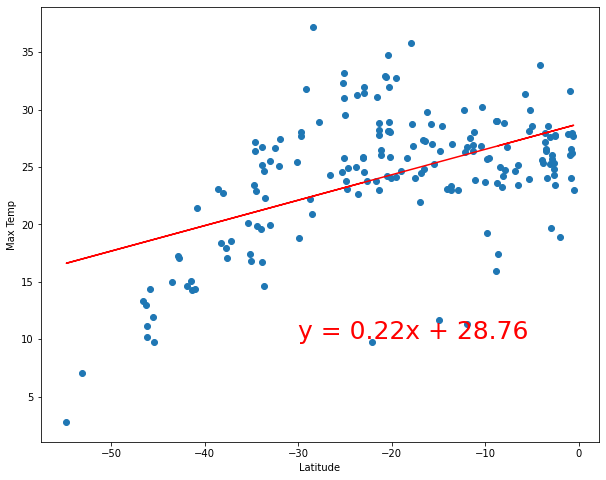

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(-30,10), fontsize=25, color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25078519749325684


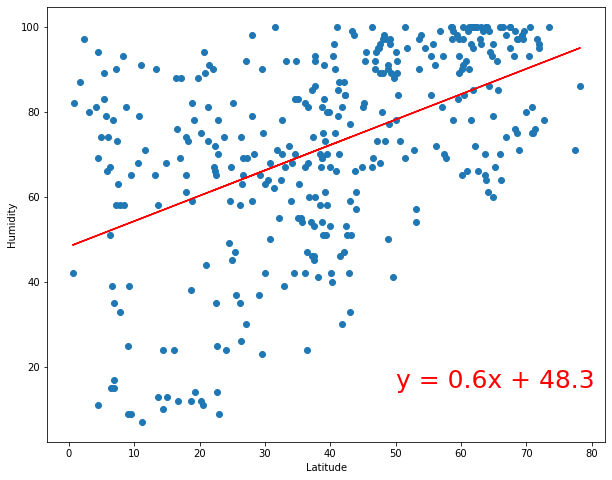

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(50,15), fontsize=25, color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.042808233518975454


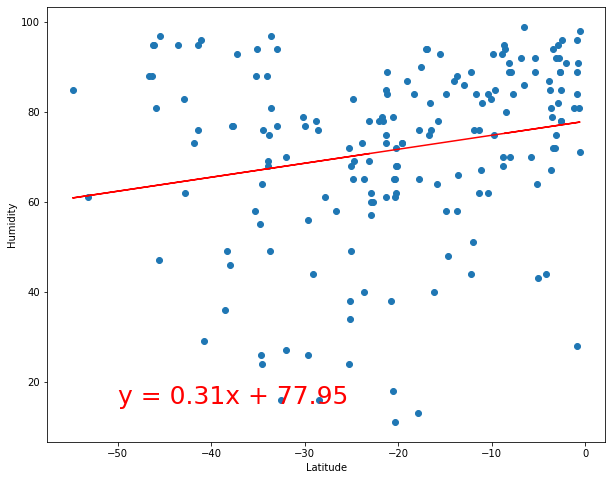

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(-50,15), fontsize=25, color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09200932163162386


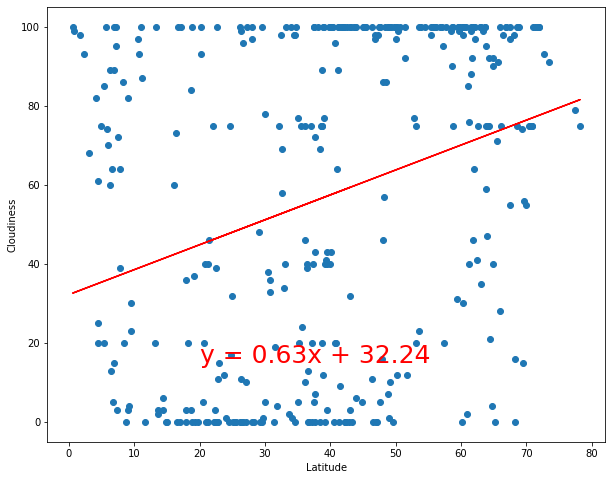

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(20,15), fontsize=25, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.04789546553666369


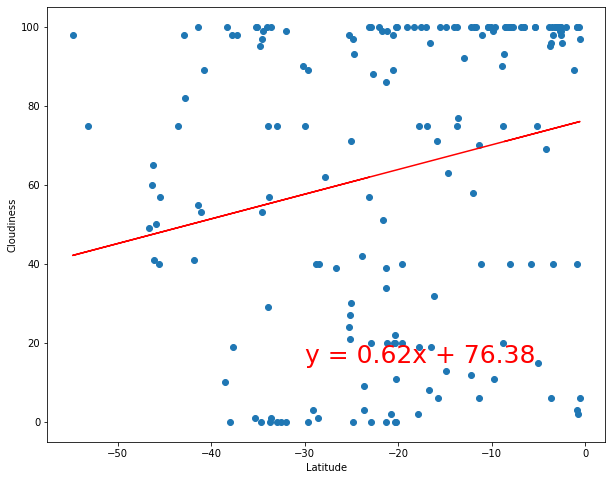

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(-30,15), fontsize=25, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0015241580232684994


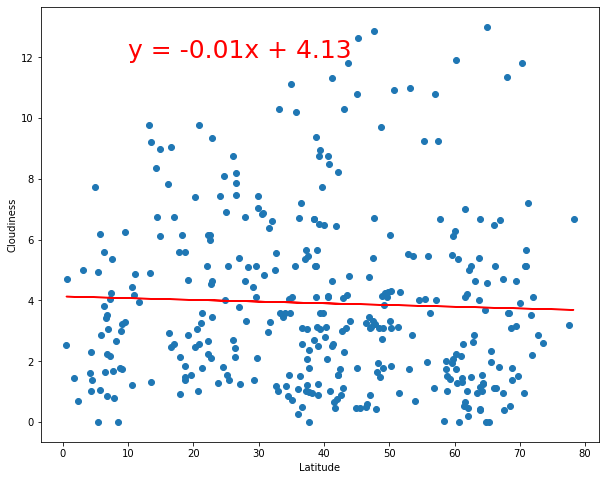

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(10,12), fontsize=25, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.056531721047551775


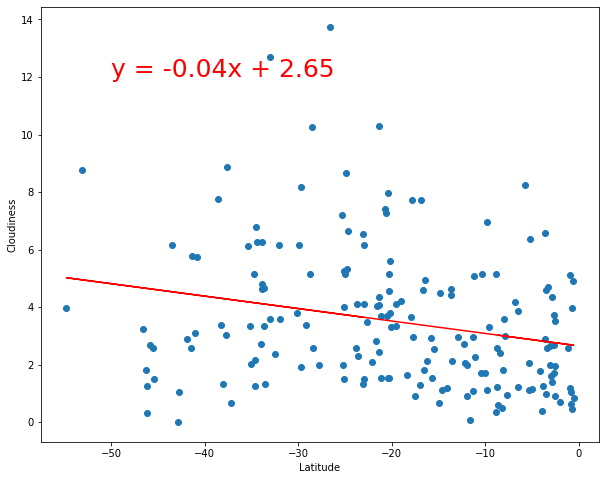

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq,(-50,12), fontsize=25, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

1. As expected, temperature correlates well with latitude. As latitude moves away from the equator, temperature also decreases.
2. It seems that there is no correlation between humidity and latitude
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic